<a href="https://colab.research.google.com/github/Menglin-Xi/Menglin-Xi/blob/master/Menglin_Xi_MLP_UCM_4Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img align="right" width="400" height="100" src="https://www.tu-braunschweig.de/typo3conf/ext/tu_braunschweig/Resources/Public/Images/Logos/tu_braunschweig_logo.svg">](https://www.tu-braunschweig.de/en/)

[Mehdi Maboudi](https://www.tu-braunschweig.de/en/igp/staff/mehdi-maboudi) \([m.maboudi@tu-bs.de](m.maboudi@tu-bs.de))

[Technical University of Braunschweig](https://www.tu-braunschweig.de/en/)  
[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/igp)  


**Image classification using MLP**  

Task 1. Implement an MLP on UCM dataset  
Task 2.   resize the images with the factor of 4(images'size = 64) and check its effect on the results.  
Task 3.   What are your suggestions for improving the results.  


**UC Merced dataset**  

Some notes about [UC Merced dataset](http://weegee.vision.ucmerced.edu/datasets/landuse.html):  
This dataset is used in the folowing paper:    

["Bag-Of-Visual-Words and Spatial Extensions for Land-Use Classification" Yi Yang and Shawn Newsam,2010](https://www.researchgate.net/profile/Shawn-Newsam/publication/221589425_Bag-of-visual-words_and_spatial_extensions_for_land-use_classification/links/09e4150e4957709cf7000000/Bag-of-visual-words-and-spatial-extensions-for-land-use-classification.pdf)



UCMerced dataset contains 21,00 images.
This is a 21 class land use image dataset meant for research purposes.

There are 100 images for each of the classe.

Each image measures 256x256 pixels (There are some exceptions which you should manage them).  

The ground sampling distance (pixel resolution on the ground) of this public domain imagery is 1 foot.




#Setup

In [ ]:
#Load the libraries which you need
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
import time
import os
import pathlib
seed = 42

##Mounting Google Drive locally

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Download the data in main_path...data_folder

In [ ]:
main_path = "/content/drive/MyDrive/ColabNotebooks/MLP_UCM/Images"
data_folder = "MLP_UCM/Images"

In [ ]:
import pathlib
AUTOTUNE = tf.data.experimental.AUTOTUNE
data_root = pathlib.Path(main_path)
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

In [ ]:
image_count = len(all_image_paths)
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_to_index = dict((name, index) for index, name in enumerate(label_names))
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]
print("image_count: ", image_count)
label_names

image_count:  2103


['agricultural',
 'airplane',
 'baseballdiamond',
 'beach',
 'buildings',
 'chaparral',
 'denseresidential',
 'forest',
 'freeway',
 'golfcourse',
 'harbor',
 'intersection',
 'mediumresidential',
 'mobilehomepark',
 'overpass',
 'parkinglot',
 'river',
 'runway',
 'sparseresidential',
 'storagetanks',
 'tenniscourt']

# resize all images

In [ ]:
# resize images into 256*256,128*128, 64*64, 32*32
save_path256 = "/content/drive/MyDrive/ColabNotebooks/MLP_UCM/Images256/"
save_path128 = "/content/drive/MyDrive/ColabNotebooks/MLP_UCM/Images128/"
save_path64 = "/content/drive/MyDrive/ColabNotebooks/MLP_UCM/Images64/"
save_path32 = "/content/drive/MyDrive/ColabNotebooks/MLP_UCM/Images32/"
for count, img_path in enumerate(all_image_paths):
    img = Image.open(img_path)
    img_resize256 = img
    if img.size is not (256, 256):
        img_resize256 = img.resize((256,256))
    img_resize128 = img.resize((128,128))
    img_resize64 = img.resize((64,64))
    img_resize32 = img.resize((32,32))

    savepath256 = os.path.join(save_path256,label_names[all_image_labels[count]])
    savefile256 = os.path.join(savepath256, label_names[all_image_labels[count]]+str(count)+".png")
    savepath128 = os.path.join(save_path128,label_names[all_image_labels[count]])
    savefile128 = os.path.join(savepath128, label_names[all_image_labels[count]]+str(count)+".png")
    savepath64 = os.path.join(save_path64,label_names[all_image_labels[count]])
    savefile64 = os.path.join(savepath64, label_names[all_image_labels[count]]+str(count)+".png")
    savepath32 = os.path.join(save_path32,label_names[all_image_labels[count]])
    savefile32 = os.path.join(savepath32, label_names[all_image_labels[count]]+str(count)+".png")

    if not os.path.exists(savepath256):
        os.makedirs(savepath256)
    if not os.path.exists(savepath128):
        os.makedirs(savepath128)
    if not os.path.exists(savepath64):
        os.makedirs(savepath64)
    if not os.path.exists(savepath32):
        os.makedirs(savepath32) 

    img_resize256.save(savefile256)  
    img_resize128.save(savefile128)    
    img_resize64.save(savefile64)
    img_resize32.save(savefile32)

In [ ]:
# read (256*256)images and save as .npy file
import pathlib
AUTOTUNE = tf.data.experimental.AUTOTUNE

save_path256 = "/content/drive/MyDrive/ColabNotebooks/MLP_UCM/Images256/"
main_path = save_path256

data_root = pathlib.Path(main_path)
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

image_count = len(all_image_paths)
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_to_index = dict((name, index) for index, name in enumerate(label_names))
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]
print("image_count: ", image_count)
print("\n label_names: ",label_names)

import time
t0 = time.time()
all_image_rows = []
for img_path in all_image_paths:
    this_image_row = tf.io.read_file(img_path)
    this_image_tensor = tf.image.decode_image(this_image_row)
    all_image_rows.append(this_image_tensor)
t1 = time.time()

print("The number of all images: ", len(all_image_rows))
all_image_nprows = np.array(all_image_rows)
print("All images dataset shape: ", all_image_nprows.shape)
np.save("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/all_imagesX.npy", all_image_nprows)
np.save("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/all_imagesY.npy", all_image_labels)
print("read and save the dataset: ",t1-t0)

image_count:  2103

 label_names:  ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']
The number of all images:  2103
All images dataset shape:  (2103, 256, 256, 3)
read and save the dataset:  542.3004922866821


# Loading UC Merced dataset

In [ ]:
# Load the dataset and consider 20% of it as test set
all_imagesX = np.load("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/all_imagesX.npy")
all_labelsY = np.load("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/all_imagesY.npy")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_imagesX,all_labelsY,
                                                    test_size=0.2,random_state=42)

In [ ]:
# As a sanity check of loading the dataset, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape,X_train.dtype)
print('Training labels shape: ', y_train.shape,y_train.dtype)
print('Test data shape: ', X_test.shape,X_test.dtype)
print('Test labels shape: ', y_test.shape,y_test.dtype)

Training data shape:  (1682, 256, 256, 3) uint8
Training labels shape:  (1682,) int64
Test data shape:  (421, 256, 256, 3) uint8
Test labels shape:  (421,) int64


#Visualize the dataset

Feel free to use the following cell or writing your own code

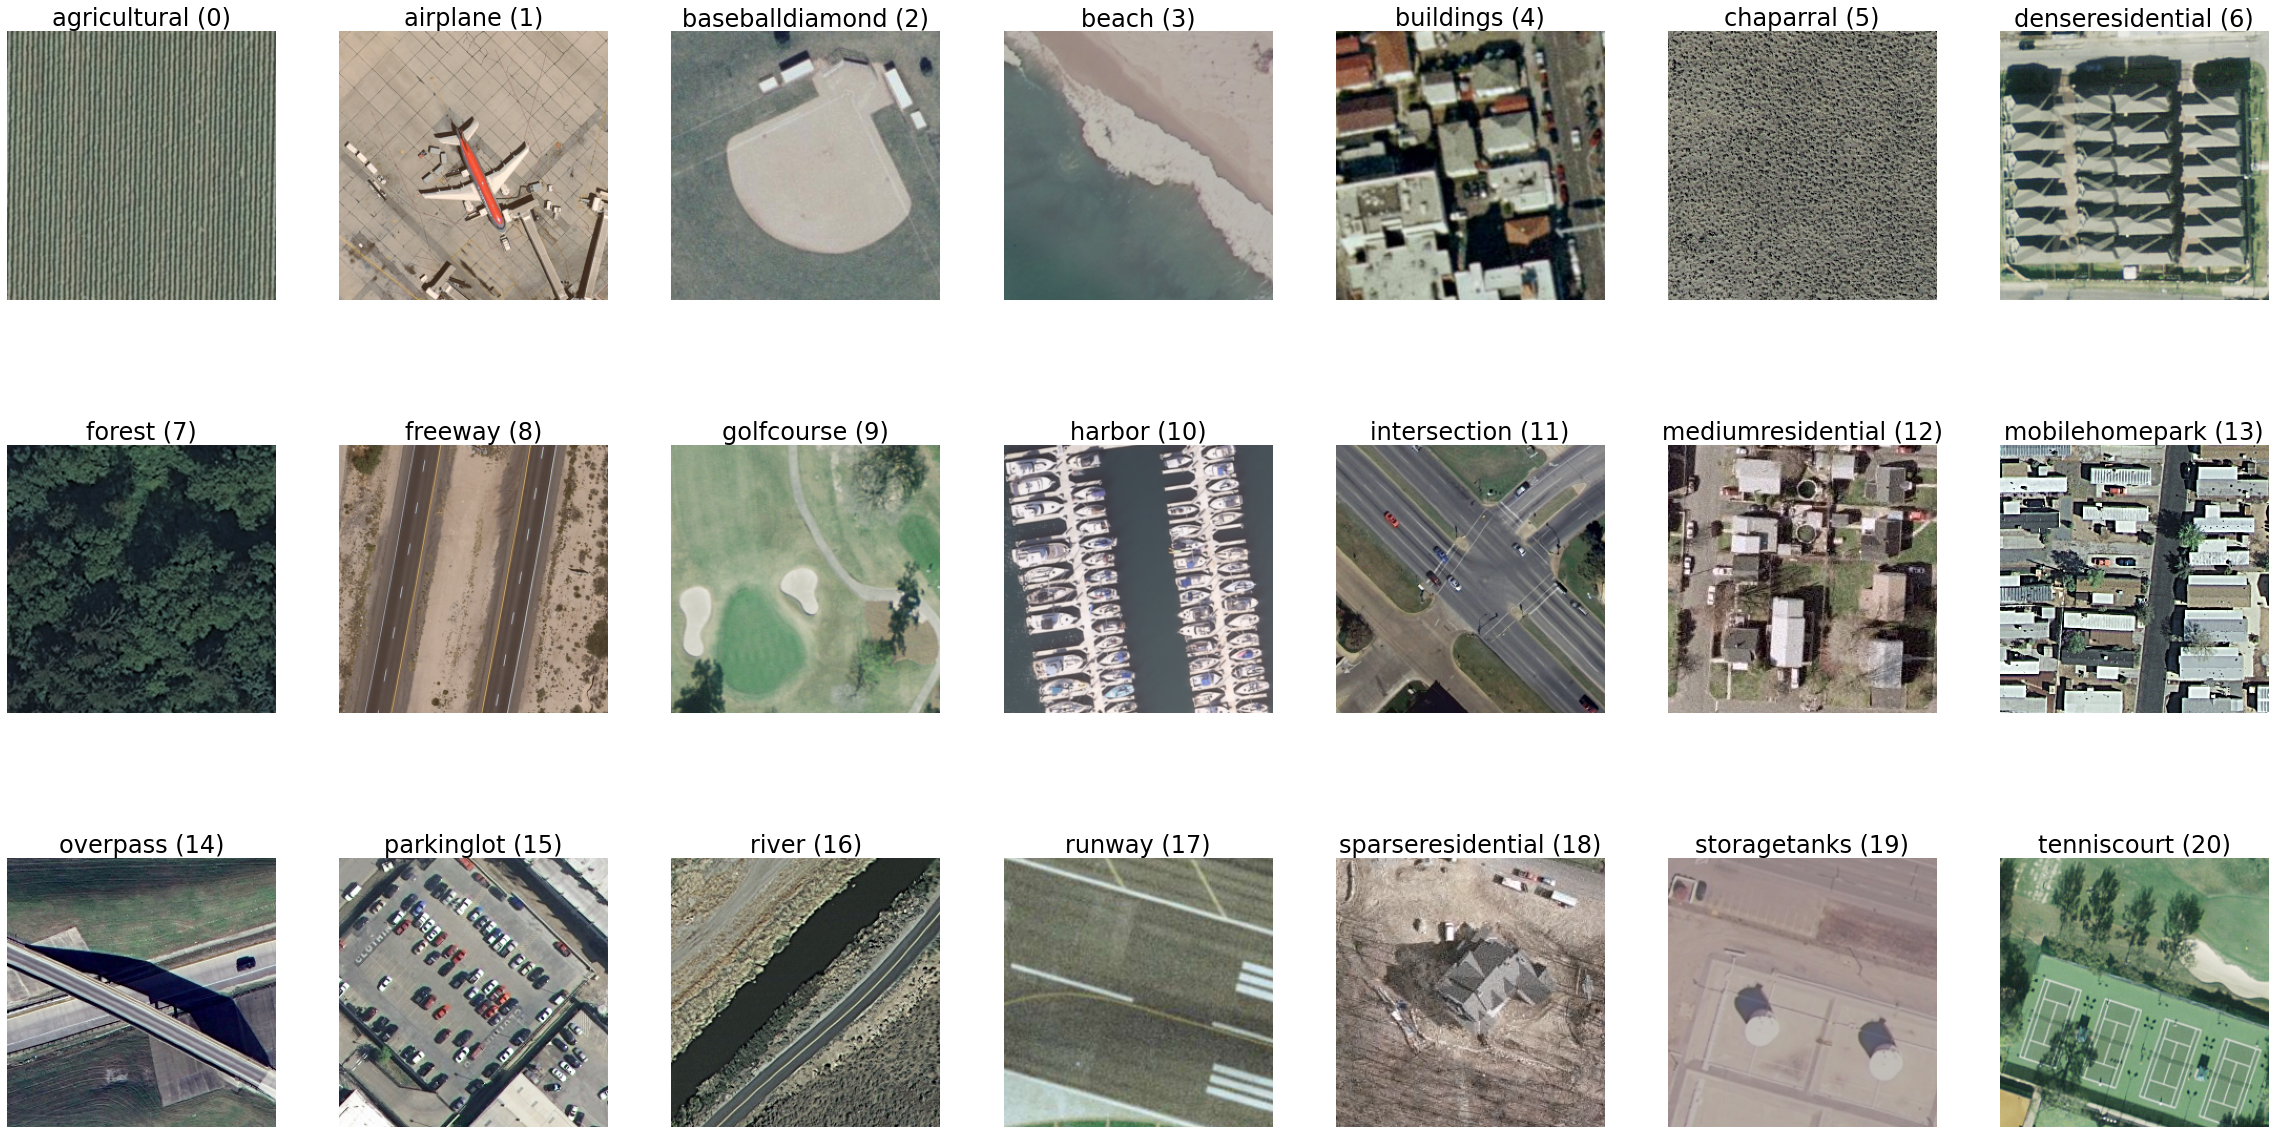

In [ ]:
# Visualize some samples from the train set.
# We show random samples of training images from each class.
class_names = label_names
num_classes = len(class_names)
samples_per_class = 1
num_rows,num_cols = 3,7
fig,ax = plt.subplots(num_rows,num_cols,figsize=(32,18))

for y, cls in enumerate(class_names):
    idx = np.flatnonzero(y_train == y)
    idx = np.random.choice(idx)
    plt_row = y//num_cols
    plt_col = y%num_cols
    plt.sca(ax[plt_row,plt_col])
    plt.imshow(X_train[idx].astype('uint8'))
    plt.axis('off')
    plt.title(cls+' ('+str(y)+')',size=24)
plt.tight_layout()    
plt.show()

#Model

##Build the model

In [ ]:
# Create an MLP
# feel free about settings.

model = keras.Sequential([
    layers.Flatten(input_shape=[256, 256, 3]),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dense(56, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dense(3, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(21, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(1e-3),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 196608)            0         
_________________________________________________________________
batch_normalization_47 (Batc (None, 196608)            786432    
_________________________________________________________________
dense_51 (Dense)             (None, 512)               100663808 
_________________________________________________________________
batch_normalization_48 (Batc (None, 512)               2048      
_________________________________________________________________
dense_52 (Dense)             (None, 21)                10773     
Total params: 101,463,061
Trainable params: 101,068,821
Non-trainable params: 394,240
_________________________________________________________________


In [ ]:
# Evaluate the model before any training on training (and/or validation set)
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 8ms/step - loss: 371.3394 - accuracy: 0.0819


[382.9675598144531, 0.06175772100687027]

##Train the Model

In [ ]:
# you can have one or more cell for training the model and hyperparameter tunning
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
EPOCHS = 25
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, callbacks=early_stop)

Epoch 1/25
43/43 [==============================] - 2s 34ms/step - loss: 3.4914 - accuracy: 0.1822 - val_loss: 27.5393 - val_accuracy: 0.0564
Epoch 2/25
43/43 [==============================] - 1s 32ms/step - loss: 2.0522 - accuracy: 0.4171 - val_loss: 6.8529 - val_accuracy: 0.1335
Epoch 3/25
43/43 [==============================] - 1s 32ms/step - loss: 1.5154 - accuracy: 0.5874 - val_loss: 3.8159 - val_accuracy: 0.2047
Epoch 4/25
43/43 [==============================] - 1s 32ms/step - loss: 1.0288 - accuracy: 0.7554 - val_loss: 2.7395 - val_accuracy: 0.3086
Epoch 5/25
43/43 [==============================] - 1s 32ms/step - loss: 0.6554 - accuracy: 0.8751 - val_loss: 2.7527 - val_accuracy: 0.2878
Epoch 6/25
43/43 [==============================] - 1s 32ms/step - loss: 0.4130 - accuracy: 0.9279 - val_loss: 2.6983 - val_accuracy: 0.3205
Epoch 7/25
43/43 [==============================] - 1s 32ms/step - loss: 0.2366 - accuracy: 0.9651 - val_loss: 2.5525 - val_accuracy: 0.3798
Epoch 8/25
4

In [ ]:
# Evaluate the model after training on test set
result = model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 8ms/step - loss: 2.8474 - accuracy: 0.3373


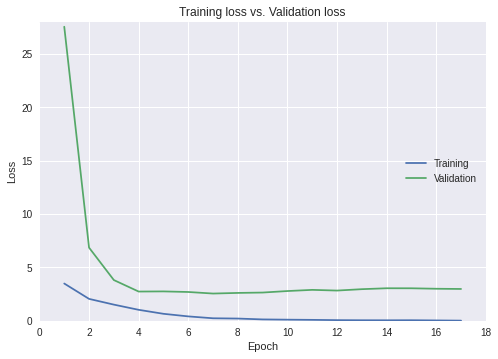

In [ ]:
import matplotlib
import numpy as np
matplotlib.style.use('seaborn')
epochs = len(history.history['loss'])
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
plt.axis([0, epochs+1, 0, round(max_loss * 2.0) / 2 + 0.5])
x = np.arange(1, epochs+1)
plt.plot(x, history.history['loss'])
plt.plot(x, history.history['val_loss'])
plt.title('Training loss vs. Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right')
plt.show()

# Task 2:
resize the images with the factor of 4 (images'size =  64) and check its effect on the results.  
Please write your finding clearly in a text cell

1. MLP is amazing because I keep trying but can't find a pattern. \\
2. The only finding is also amazing, the pixels have become smaller and the accuracy has surprisingly improved. \\
    (256,256)Images->test-acc 32.78%, \\
    (128,128)Images->test-acc 34.68%, \\
    (64,64)Images->test-acc 35.63%, \\
    (32,32)Images->test-acc 39.19%.
3. After compression, the original model is no longer suitable, and the "layers.Flatten" needs to be readjusted, and the training time is shortened. \\
4. The early stop mechanism can effectively avoid overfitting. \\
5. 
        history = model.fit(X_train, y_train, epochs=EPOCHS,validation_split = 0.2, callbacks=early_stop)
    This function internally divides the validation set randomly, so it will also affect the test acc.
6. 
        model32 = keras.Sequential()
    Random numbers are used when the model is built, or rather, when the model is initialized. The application of random numbers here also has a direct impact on the test acc.
7. My question: How to avoid the interference of random numbers inside the function when the parameters are adjusted? Maybe the effect of random numbers is greater than the effect of parameter adjustment, then the meaning of parameter adjustment is very weak.

## work on images (128,128)
1. read .png images
2. save as .npy file
3. load train128X, and label128y
4. build model
5. train and fit
6. show the results



### read and save（DO NOT RUN）

In [ ]:
# 1. read .png images

path128 = "/content/drive/MyDrive/ColabNotebooks/MLP_UCM/Images128"

import pathlib
AUTOTUNE = tf.data.experimental.AUTOTUNE
data_root = pathlib.Path(path128)
all_image128_paths = list(data_root.glob('*/*'))
all_image128_paths = [str(path) for path in all_image128_paths]

image_count = len(all_image128_paths)
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_to_index = dict((name, index) for index, name in enumerate(label_names))
all_image128_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image128_paths]
print("image_count: ", image_count)
print('label_names: ',label_names)

image_count:  2103
label_names:  ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']


In [ ]:
# 2. save as .npy file

import time
t0 = time.time()
all_image128_rows = []
for img_path in all_image128_paths:
    this_image_row = tf.io.read_file(img_path)
    this_image_tensor = tf.image.decode_image(this_image_row)
    all_image128_rows.append(this_image_tensor)
t1 = time.time()

print("The number of all images: ", len(all_image128_rows))
all_image128_nprows = np.array(all_image128_rows)
print("All images dataset shape: ", all_image128_nprows.shape)
np.save("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/all_images128X.npy", all_image128_nprows)
np.save("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/all_images128Y.npy", all_image128_labels)
np.save("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/label_names128.npy", label_names)
print("read and save the dataset: ",t1-t0)

The number of all images:  2103
All images dataset shape:  (2103, 128, 128, 3)
read and save the dataset:  499.22459602355957


### load train128X, and label128y

In [ ]:
# 3. load train128X, and label128y

all_images128X = np.load("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/all_images128X.npy")
all_labels128Y = np.load("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/all_images128Y.npy")
label_names = np.load("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/label_names128.npy")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_images128X,all_labels128Y,
                                                    test_size=0.2,random_state=42)
print('Training data shape: ', X_train.shape,X_train.dtype)
print('Training labels shape: ', y_train.shape,y_train.dtype)
print('Test data shape: ', X_test.shape,X_test.dtype)
print('Test labels shape: ', y_test.shape,y_test.dtype)
print('\nclass_names: ',label_names)

Training data shape:  (1682, 128, 128, 3) uint8
Training labels shape:  (1682,) int64
Test data shape:  (421, 128, 128, 3) uint8
Test labels shape:  (421,) int64

class_names:  ['agricultural' 'airplane' 'baseballdiamond' 'beach' 'buildings'
 'chaparral' 'denseresidential' 'forest' 'freeway' 'golfcourse' 'harbor'
 'intersection' 'mediumresidential' 'mobilehomepark' 'overpass'
 'parkinglot' 'river' 'runway' 'sparseresidential' 'storagetanks'
 'tenniscourt']


### visualize the dataset(128,128)

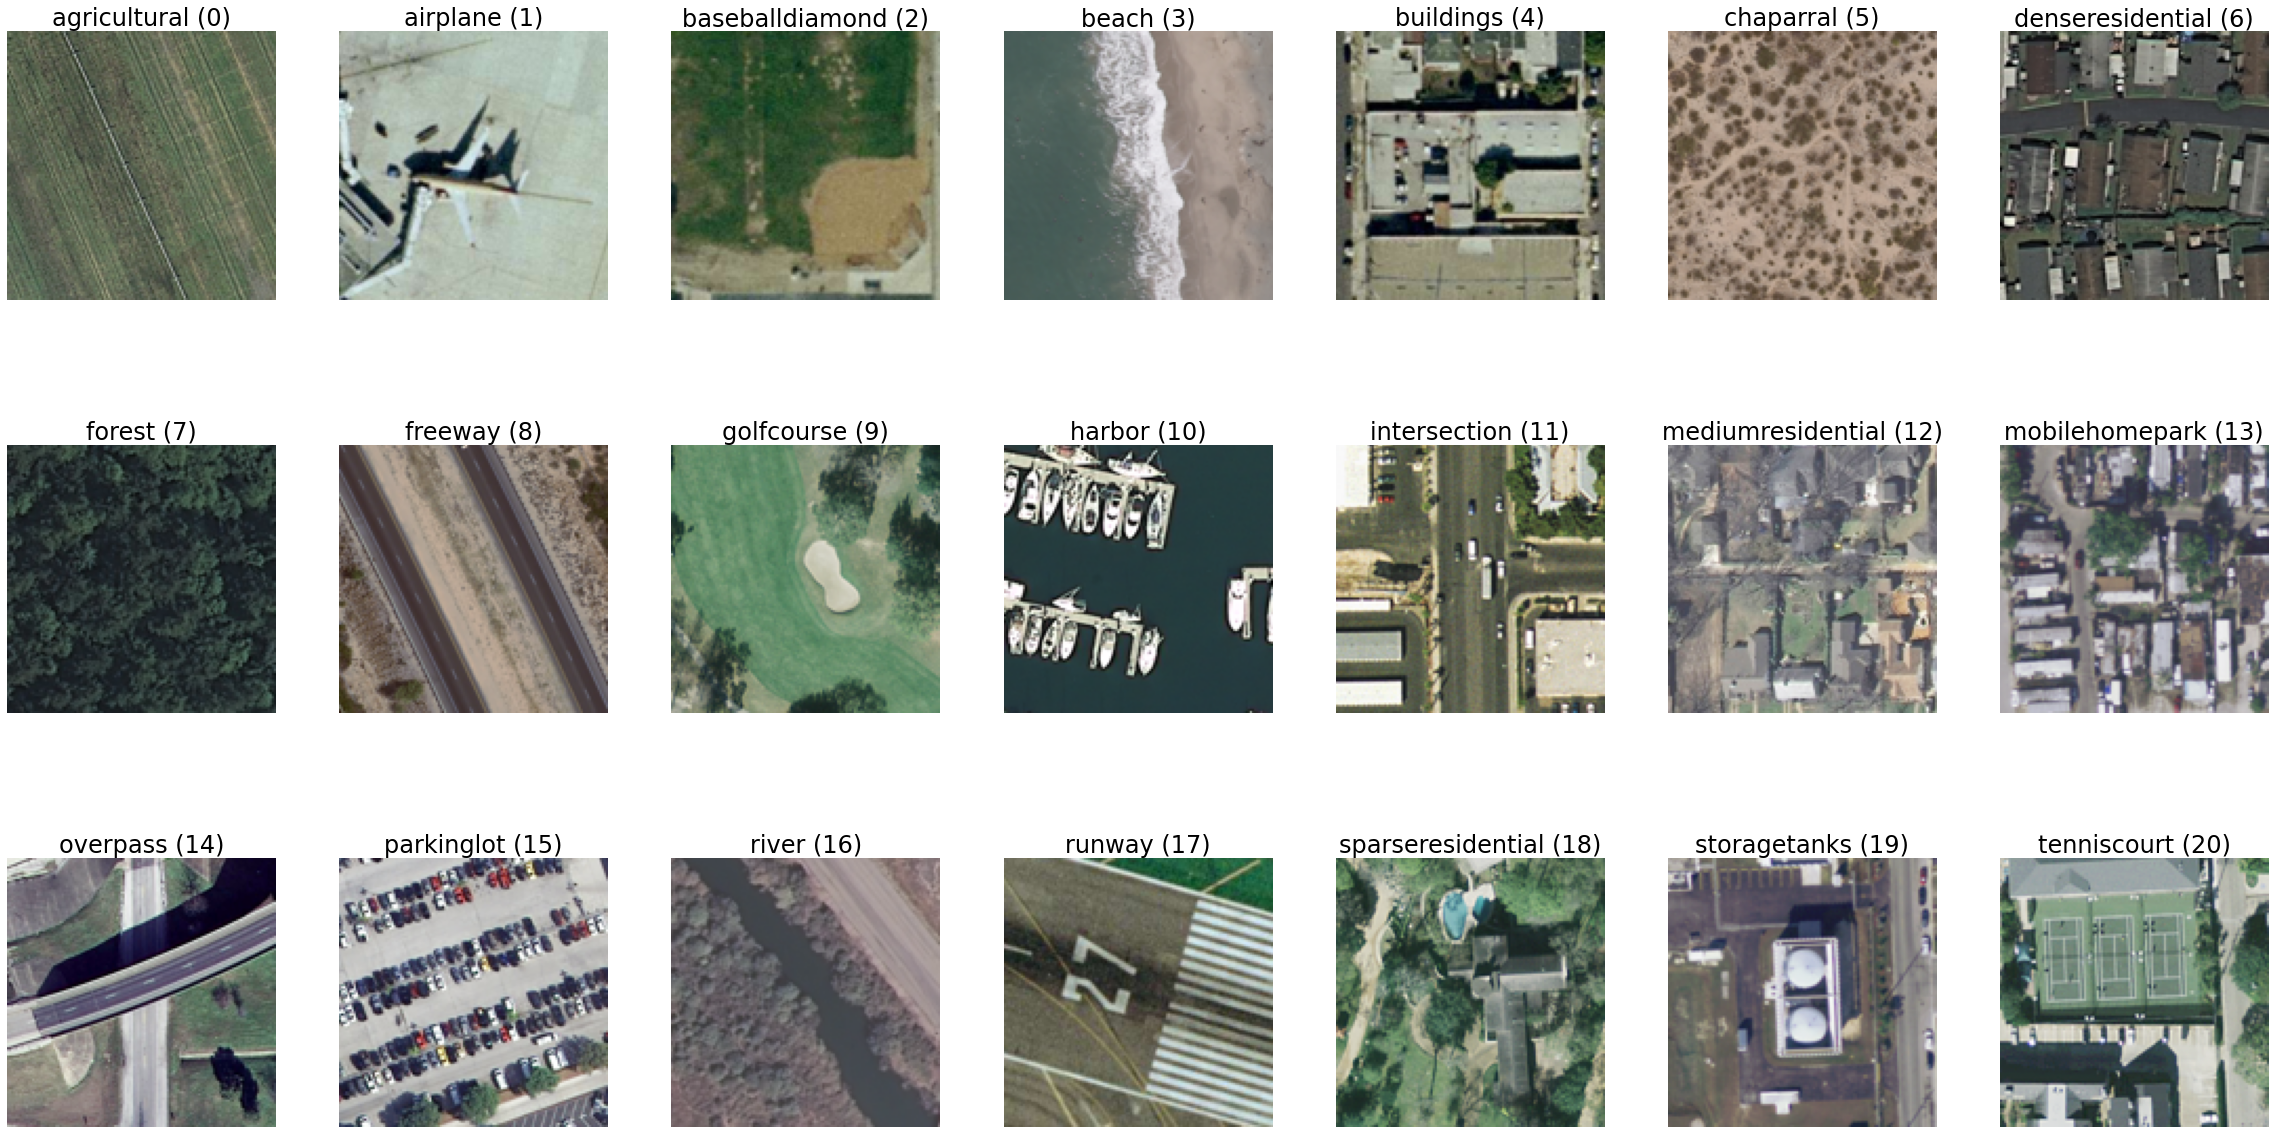

In [ ]:
# Visualize some samples from the train set.
# We show random samples of training images from each class.
class_names = label_names
num_classes = len(class_names)
samples_per_class = 1
num_rows,num_cols = 3,7
fig,ax = plt.subplots(num_rows,num_cols,figsize=(32,18))

for y, cls in enumerate(class_names):
    idx = np.flatnonzero(y_train == y)
    idx = np.random.choice(idx)
    plt_row = y//num_cols
    plt_col = y%num_cols
    plt.sca(ax[plt_row,plt_col])
    plt.imshow(X_train[idx].astype('uint8'))
    plt.axis('off')
    plt.title(cls+' ('+str(y)+')',size=24)
plt.tight_layout()    
plt.show()

### model: build, train, test

In [ ]:
# 4. build the model
model128 = keras.Sequential([
    layers.Flatten(input_shape=[128, 128, 3]),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    #layers.BatchNormalization(),
    layers.Dense(1280, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dense(3, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(21,activation='softmax')
])

model128.compile(optimizer=keras.optimizers.Adam(1e-3),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

model128.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 49152)             0         
_________________________________________________________________
batch_normalization_45 (Batc (None, 49152)             196608    
_________________________________________________________________
dense_48 (Dense)             (None, 1024)              50332672  
_________________________________________________________________
dense_49 (Dense)             (None, 1280)              1312000   
_________________________________________________________________
batch_normalization_46 (Batc (None, 1280)              5120      
_________________________________________________________________
dense_50 (Dense)             (None, 21)                26901     
Total params: 51,873,301
Trainable params: 51,772,437
Non-trainable params: 100,864
___________________________________

In [ ]:
result = model128.evaluate(X_test, y_test)

14/14 [==============================] - 0s 5ms/step - loss: 274.7224 - accuracy: 0.0346


In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
EPOCHS = 25
history = model128.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, callbacks=early_stop)

Epoch 1/25
43/43 [==============================] - 1s 18ms/step - loss: 2.9941 - accuracy: 0.1844 - val_loss: 37.6251 - val_accuracy: 0.0682
Epoch 2/25
43/43 [==============================] - 1s 17ms/step - loss: 2.3168 - accuracy: 0.3420 - val_loss: 15.7871 - val_accuracy: 0.0564
Epoch 3/25
43/43 [==============================] - 1s 16ms/step - loss: 1.9978 - accuracy: 0.4238 - val_loss: 4.3796 - val_accuracy: 0.1098
Epoch 4/25
43/43 [==============================] - 1s 16ms/step - loss: 1.7281 - accuracy: 0.5167 - val_loss: 3.3473 - val_accuracy: 0.1958
Epoch 5/25
43/43 [==============================] - 1s 17ms/step - loss: 1.4590 - accuracy: 0.5896 - val_loss: 3.1453 - val_accuracy: 0.2433
Epoch 6/25
43/43 [==============================] - 1s 16ms/step - loss: 1.2448 - accuracy: 0.6461 - val_loss: 2.9062 - val_accuracy: 0.2463
Epoch 7/25
43/43 [==============================] - 1s 16ms/step - loss: 1.0518 - accuracy: 0.7145 - val_loss: 2.5317 - val_accuracy: 0.3116
Epoch 8/25


In [ ]:
result = model128.evaluate(X_test, y_test)

14/14 [==============================] - 0s 4ms/step - loss: 2.9429 - accuracy: 0.3658


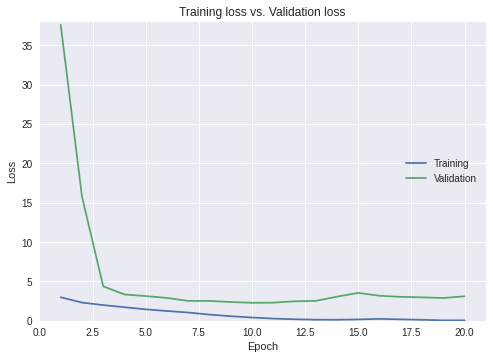

In [ ]:
import matplotlib
import numpy as np
matplotlib.style.use('seaborn')
epochs = len(history.history['loss'])
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
plt.axis([0, epochs+1, 0, round(max_loss * 2.0) / 2 + 0.5])
x = np.arange(1, epochs+1)
plt.plot(x, history.history['loss'])
plt.plot(x, history.history['val_loss'])
plt.title('Training loss vs. Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right')
plt.show()

## work on images (64, 64)

### read and save (DO NOT RUN)

In [ ]:
# 1. read .png images

path64 = "/content/drive/MyDrive/ColabNotebooks/MLP_UCM/Images64"

import pathlib
AUTOTUNE = tf.data.experimental.AUTOTUNE
data_root = pathlib.Path(path64)
all_image64_paths = list(data_root.glob('*/*'))
all_image64_paths = [str(path) for path in all_image64_paths]

image_count = len(all_image64_paths)
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_to_index = dict((name, index) for index, name in enumerate(label_names))
all_image64_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image64_paths]
print("image_count: ", image_count)
print('label_names: ',label_names)

image_count:  2103
label_names:  ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']


In [ ]:
# 2. save as .npy file

import time
t0 = time.time()
all_image64_rows = []
for img_path in all_image64_paths:
    this_image_row = tf.io.read_file(img_path)
    this_image_tensor = tf.image.decode_image(this_image_row)
    all_image64_rows.append(this_image_tensor)
t1 = time.time()

print("The number of all images: ", len(all_image64_rows))
all_image64_nprows = np.array(all_image64_rows)
print("All images dataset shape: ", all_image64_nprows.shape)
np.save("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/all_images64X.npy", all_image64_nprows)
np.save("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/all_images64Y.npy", all_image64_labels)
np.save("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/label_names64.npy", label_names)
print("read and save the dataset: ",t1-t0)

The number of all images:  2103
All images dataset shape:  (2103, 64, 64, 3)
read and save the dataset:  506.7805771827698


### load train64X, label64Y

In [ ]:
# 3. load train64X, and label64y

all_images64X = np.load("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/all_images64X.npy")
all_labels64Y = np.load("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/all_images64Y.npy")
label_names = np.load("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/label_names64.npy")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_images64X,all_labels64Y,
                                                    test_size=0.2,random_state=42)
print('Training data shape: ', X_train.shape,X_train.dtype)
print('Training labels shape: ', y_train.shape,y_train.dtype)
print('Test data shape: ', X_test.shape,X_test.dtype)
print('Test labels shape: ', y_test.shape,y_test.dtype)
print('\nclass_names',label_names)

Training data shape:  (1682, 64, 64, 3) uint8
Training labels shape:  (1682,) int64
Test data shape:  (421, 64, 64, 3) uint8
Test labels shape:  (421,) int64

class_names ['agricultural' 'airplane' 'baseballdiamond' 'beach' 'buildings'
 'chaparral' 'denseresidential' 'forest' 'freeway' 'golfcourse' 'harbor'
 'intersection' 'mediumresidential' 'mobilehomepark' 'overpass'
 'parkinglot' 'river' 'runway' 'sparseresidential' 'storagetanks'
 'tenniscourt']


### model: build, train, test


In [ ]:
# 4. build the model
model64 = keras.Sequential([
    layers.Flatten(input_shape=[64, 64, 3]),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(21,activation='softmax')
])

model64.compile(optimizer=keras.optimizers.Adam(1e-3),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

model64.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 12288)             0         
_________________________________________________________________
batch_normalization_52 (Batc (None, 12288)             49152     
_________________________________________________________________
dense_56 (Dense)             (None, 1024)              12583936  
_________________________________________________________________
batch_normalization_53 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_57 (Dense)             (None, 256)               262400    
_________________________________________________________________
batch_normalization_54 (Batc (None, 256)               1024      
_________________________________________________________________
dense_58 (Dense)             (None, 21)              

In [ ]:
result = model64.evaluate(X_test, y_test)

14/14 [==============================] - 0s 3ms/step - loss: 267.5245 - accuracy: 0.0399


In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
EPOCHS = 25
history = model64.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, callbacks=early_stop)

Epoch 1/25
43/43 [==============================] - 1s 9ms/step - loss: 2.8105 - accuracy: 0.2305 - val_loss: 36.5633 - val_accuracy: 0.0772
Epoch 2/25
43/43 [==============================] - 0s 7ms/step - loss: 1.8178 - accuracy: 0.4773 - val_loss: 11.6213 - val_accuracy: 0.0831
Epoch 3/25
43/43 [==============================] - 0s 7ms/step - loss: 1.2379 - accuracy: 0.6498 - val_loss: 3.9469 - val_accuracy: 0.1958
Epoch 4/25
43/43 [==============================] - 0s 8ms/step - loss: 0.7380 - accuracy: 0.8134 - val_loss: 3.8894 - val_accuracy: 0.1929
Epoch 5/25
43/43 [==============================] - 0s 7ms/step - loss: 0.5062 - accuracy: 0.8803 - val_loss: 3.0747 - val_accuracy: 0.2641
Epoch 6/25
43/43 [==============================] - 0s 7ms/step - loss: 0.3444 - accuracy: 0.9138 - val_loss: 2.7323 - val_accuracy: 0.3234
Epoch 7/25
43/43 [==============================] - 0s 7ms/step - loss: 0.2864 - accuracy: 0.9316 - val_loss: 2.9063 - val_accuracy: 0.2878
Epoch 8/25
43/43 [

In [ ]:
result = model64.evaluate(X_test, y_test)

14/14 [==============================] - 0s 3ms/step - loss: 3.0527 - accuracy: 0.3729


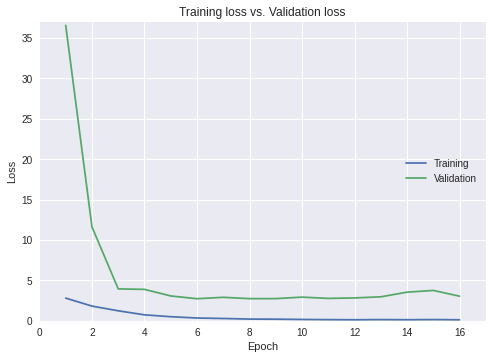

In [ ]:
import matplotlib
import numpy as np
matplotlib.style.use('seaborn')
epochs = len(history.history['loss'])
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
plt.axis([0, epochs+1, 0, round(max_loss * 2.0) / 2 + 0.5])
x = np.arange(1, epochs+1)
plt.plot(x, history.history['loss'])
plt.plot(x, history.history['val_loss'])
plt.title('Training loss vs. Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right')
plt.show()

## work on images(32, 32)

### read and save (DO NOT RUN)

In [ ]:
# 1. read .png images

path32 = "/content/drive/MyDrive/ColabNotebooks/MLP_UCM/Images32"

import pathlib
AUTOTUNE = tf.data.experimental.AUTOTUNE
data_root = pathlib.Path(path32)
all_image32_paths = list(data_root.glob('*/*'))
all_image32_paths = [str(path) for path in all_image32_paths]

image_count = len(all_image32_paths)
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_to_index = dict((name, index) for index, name in enumerate(label_names))
all_image32_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image32_paths]
print("image_count: ", image_count)
print('label_names: ',label_names)

image_count:  2103
label_names:  ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']


In [ ]:
# 2. save as .npy file

import time
t0 = time.time()
all_image32_rows = []
for img_path in all_image32_paths:
    this_image_row = tf.io.read_file(img_path)
    this_image_tensor = tf.image.decode_image(this_image_row)
    all_image32_rows.append(this_image_tensor)
t1 = time.time()

print("The number of all images: ", len(all_image32_rows))
all_image32_nprows = np.array(all_image32_rows)
print("All images dataset shape: ", all_image32_nprows.shape)
np.save("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/all_images32X.npy", all_image32_nprows)
np.save("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/all_images32Y.npy", all_image32_labels)
np.save("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/label_names32.npy", label_names)
print("read and save the dataset: ",t1-t0)

The number of all images:  2103
All images dataset shape:  (2103, 32, 32, 3)
read and save the dataset:  508.3361291885376


### load train32X, label32Y

In [ ]:
# 3. load train32X, and label32y

all_images32X = np.load("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/all_images32X.npy")
all_labels32Y = np.load("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/all_images32Y.npy")
label_names = np.load("/content/drive/MyDrive/ColabNotebooks/MLP_UCM/label_names32.npy")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_images32X,all_labels32Y,
                                                    test_size=0.2,random_state=42)
print('Training data shape: ', X_train.shape,X_train.dtype)
print('Training labels shape: ', y_train.shape,y_train.dtype)
print('Test data shape: ', X_test.shape,X_test.dtype)
print('Test labels shape: ', y_test.shape,y_test.dtype)
print('\nclass_names',label_names)

Training data shape:  (1682, 32, 32, 3) uint8
Training labels shape:  (1682,) int64
Test data shape:  (421, 32, 32, 3) uint8
Test labels shape:  (421,) int64

class_names ['agricultural' 'airplane' 'baseballdiamond' 'beach' 'buildings'
 'chaparral' 'denseresidential' 'forest' 'freeway' 'golfcourse' 'harbor'
 'intersection' 'mediumresidential' 'mobilehomepark' 'overpass'
 'parkinglot' 'river' 'runway' 'sparseresidential' 'storagetanks'
 'tenniscourt']


### model: build, train, test

In [ ]:
# 4. build the model
model32 = keras.Sequential([
    layers.Flatten(input_shape=[32, 32, 3]),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dense(3, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(21)
    #layers.Dense(21,activation='softmax')
])

model32.compile(optimizer=keras.optimizers.Adam(1e-3),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

model32.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_25 (Flatten)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_61 (Batc (None, 3072)              12288     
_________________________________________________________________
dense_65 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
batch_normalization_62 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_66 (Dense)             (None, 128)               131200    
_________________________________________________________________
batch_normalization_63 (Batc (None, 128)               512       
_________________________________________________________________
dense_67 (Dense)             (None, 21)              

In [ ]:
result = model32.evaluate(X_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 294.0716 - accuracy: 0.0401


In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
EPOCHS = 25
history = model32.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, callbacks=early_stop)

Epoch 1/25
43/43 [==============================] - 1s 6ms/step - loss: 2.8103 - accuracy: 0.2290 - val_loss: 17.6927 - val_accuracy: 0.0831
Epoch 2/25
43/43 [==============================] - 0s 5ms/step - loss: 1.7786 - accuracy: 0.5145 - val_loss: 7.9867 - val_accuracy: 0.1246
Epoch 3/25
43/43 [==============================] - 0s 6ms/step - loss: 1.2394 - accuracy: 0.6691 - val_loss: 4.0615 - val_accuracy: 0.1988
Epoch 4/25
43/43 [==============================] - 0s 5ms/step - loss: 0.8287 - accuracy: 0.7866 - val_loss: 3.6156 - val_accuracy: 0.2493
Epoch 5/25
43/43 [==============================] - 0s 5ms/step - loss: 0.6209 - accuracy: 0.8610 - val_loss: 2.6427 - val_accuracy: 0.2819
Epoch 6/25
43/43 [==============================] - 0s 5ms/step - loss: 0.4634 - accuracy: 0.8907 - val_loss: 3.2213 - val_accuracy: 0.2997
Epoch 7/25
43/43 [==============================] - 0s 5ms/step - loss: 0.4309 - accuracy: 0.8981 - val_loss: 2.5118 - val_accuracy: 0.2997
Epoch 8/25
43/43 [=

In [ ]:
result = model32.evaluate(X_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 2.9326 - accuracy: 0.3777


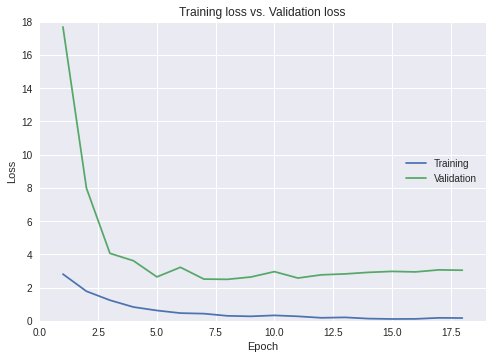

In [ ]:
import matplotlib
import numpy as np
matplotlib.style.use('seaborn')
epochs = len(history.history['loss'])
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
plt.axis([0, epochs+1, 0, round(max_loss * 2.0) / 2 + 0.5])
x = np.arange(1, epochs+1)
plt.plot(x, history.history['loss'])
plt.plot(x, history.history['val_loss'])
plt.title('Training loss vs. Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right')
plt.show()

# Task 3
What are your suggestions for improving the results.  
You do not have to implement it. But if you do, would be perfect.

In [ ]:
# you can have one or more cell for this task
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

1. According to the function definition, we can add the bias vector: bias_regularizer. \\
2. Overfitting occurs during training, so the control condition of early end should be set. \\
3. MLP is not a good method with dataset UCM. Because I can't reach 40%.